In [1]:
import pandas as pd

df = pd.read_csv("/home/laviniad/projects/religion_in_congress/data/congress_speakers.csv")

In [2]:
df.columns

Index(['bio_id', 'speaker_name', 'chamber', 'state', 'gender', 'total_words',
       'total_keywords', 'total_god_mentions', 'total_biblical_references'],
      dtype='object')

In [4]:
bioguides = "/data/laviniad/congress_bioguides.jsonlist"
bioguides = pd.read_json(bioguides, lines=True)

In [7]:
bioguides.columns

Index(['usCongressBioId', 'familyName', 'givenName', 'unaccentedFamilyName',
       'unaccentedGivenName', 'birthDate', 'birthCirca', 'deathCirca', 'image',
       'profileText', 'relationship', 'asset', 'jobPositions', 'creativeWork',
       'researchRecord', 'deleted', 'party', 'middleName',
       'unaccentedMiddleName', 'deathDate', 'honorificPrefix', 'nickName',
       'birthDateUnknown', 'deathDateUnknown', 'honorificSuffix',
       'nameHistory'],
      dtype='object')

In [9]:
df["party"] = df["bio_id"].map(bioguides.set_index("usCongressBioId")["party"])

In [16]:
# avg kw rate for democratic men, democratic women, republican men, and republican women

dems = df[(df["party"] == "Democrat")]
reps = df[(df["party"] == "Republican")]

dem_women = dems[(dems["gender"] == "F")]
dem_men = dems[((dems["gender"] == "M"))]

rep_women = reps[(reps["gender"] == "F")]
rep_men = reps[(reps["gender"] == "M")]

for group in df, dem_men, dem_women, rep_men, rep_women:
    group["kw_rate"] = group["total_keywords"] / group["total_words"]

/tmp/ipykernel_20273/85663223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["kw_rate"] = group["total_keywords"] / group["total_words"]
/tmp/ipykernel_20273/85663223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["kw_rate"] = group["total_keywords"] / group["total_words"]
/tmp/ipykernel_20273/85663223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [14]:
print(f"Democratic men use religious keywords at a rate of {dem_men['kw_rate'].mean()} +- {dem_men['kw_rate'].std()}")
print(f"Democratic women use religious keywords at a rate of {dem_women['kw_rate'].mean()} +- {dem_women['kw_rate'].std()}")
print(f"Republican men use religious keywords at a rate of {rep_men['kw_rate'].mean()} +- {rep_men['kw_rate'].std()}")
print(f"Republican women use religious keywords at a rate of {rep_women['kw_rate'].mean()} +- {rep_women['kw_rate'].std()}")

Democratic men use religious keywords at a rate of 0.00015854947403950471 +- 0.0003327158755100034
Democratic women use religious keywords at a rate of 0.0001589490148806713 +- 0.0007555272246798444
Republican men use religious keywords at a rate of 0.0002590287013619322 +- 0.0003704691897847275
Republican women use religious keywords at a rate of 0.00025765029290924097 +- 0.00033323755459365925


/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


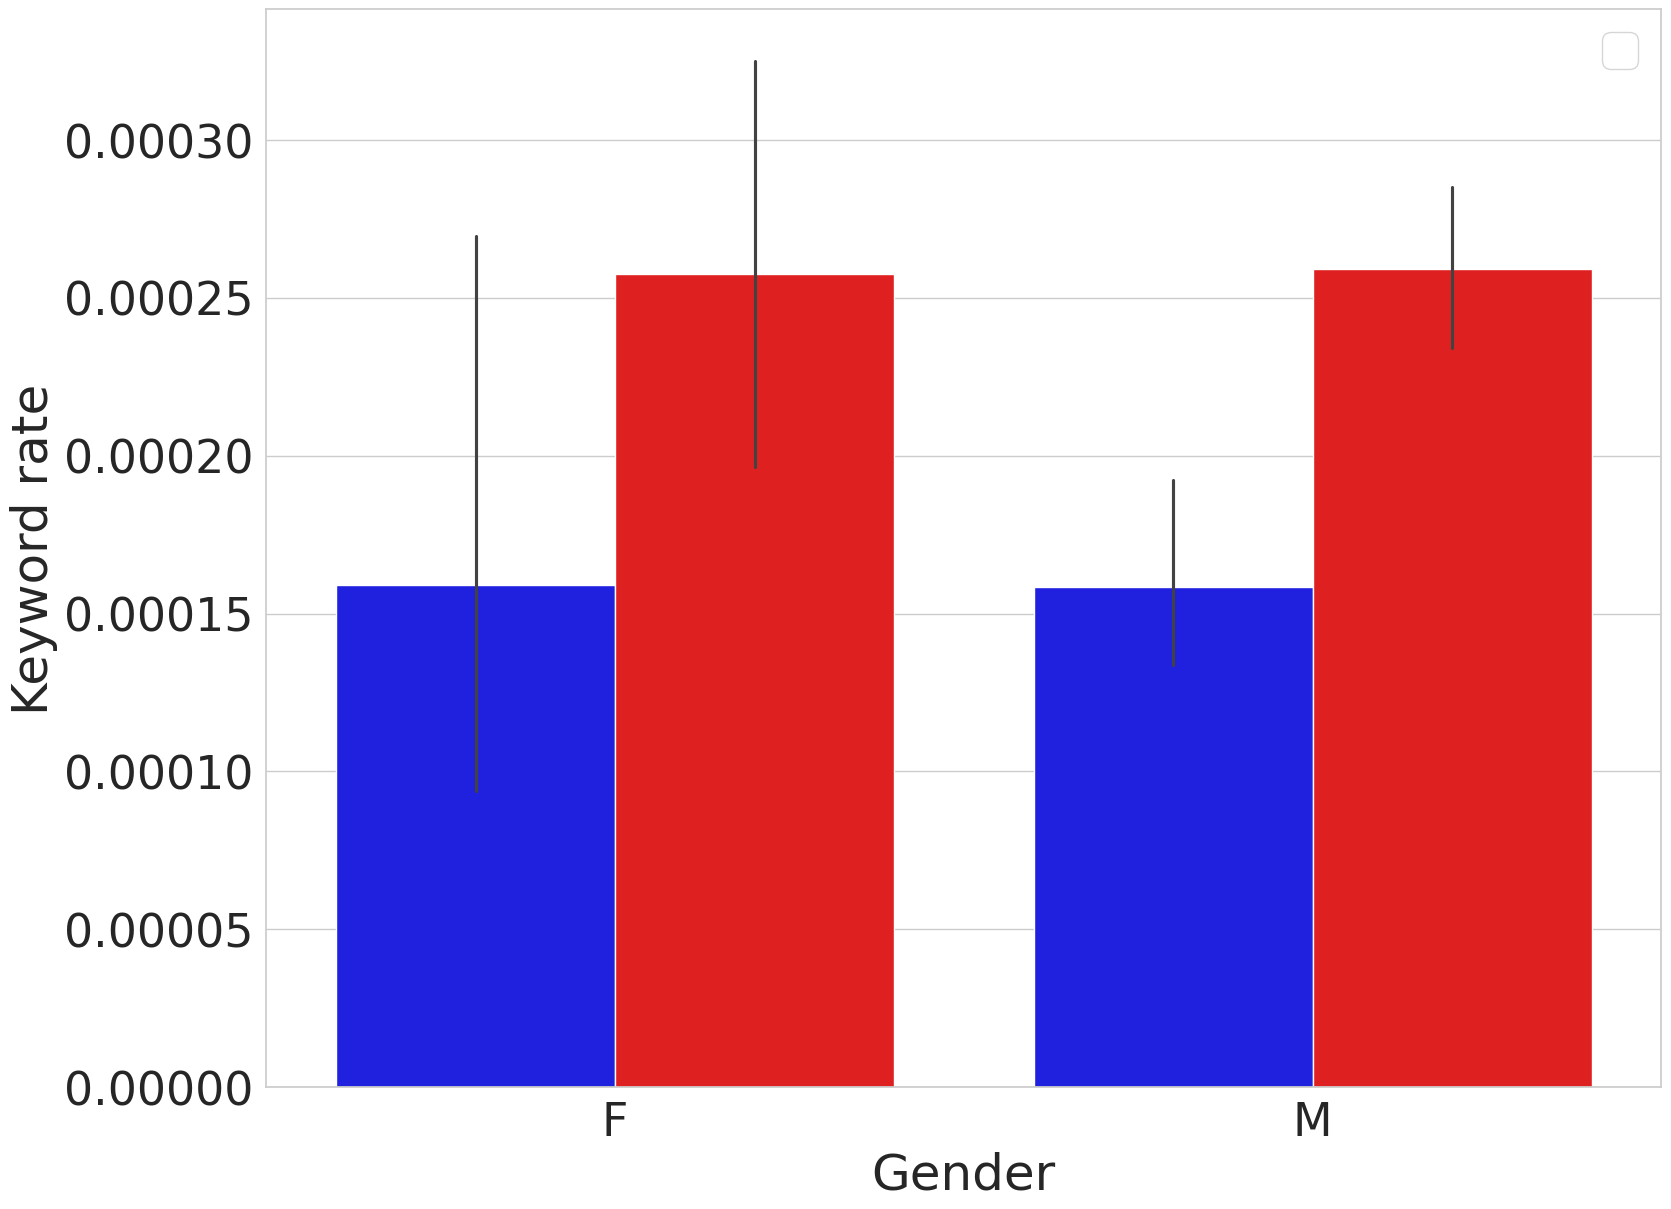

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=3, rc={'figure.figsize':(18,14), 'font.weight': 'normal'}, style='whitegrid')

palette = {"Democrat": "blue", "Republican": "red"}
lim_data = df[df['party'].isin(['Democrat', 'Republican'])]
sns.barplot(x="gender", y="kw_rate", hue="party", data=lim_data, palette=palette)

plt.legend('')
plt.xlabel("Gender")
plt.ylabel("Keyword rate")

plt.savefig("/home/laviniad/projects/religion_in_congress/notebooks/plots/gender_kw_rate.pdf", bbox_inches='tight', dpi=300, format='pdf')
plt.show()